# Analysis of Factors impacting Student Grades

### PROJECT SPECIFICATION
- **Data Set:** Student Performance Data Set (source: https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Project Question:** How are each student's individual final grades impacted by their family/home backgrounds, individual effort, demography, past academic records, and extra-curricular educational support?

### INTRODUCTION


**Project Background Information**

One of the most pertinent questions looming over educators' heads worldwide is, **what are the most important factors that determine a student's ability to learn?** Large discrepencies in individual's grades exist within most schools, despite most students receiving the same shared resources (e.g. teachers, books, etc.) within school and educational curriculum between schools. Hence, it is important that we look at other factors outside of school that may influence a student's learning ability.

Before continuing further, we need to make the assumption that grades are good indication of a student's ability to learn, reflecting their ability to understand and grasp the concepts learned in their respective subjects. Although in reality, this assumption does not always hold, we have chosen grades as our response variable to reflect one's learning ability because it is still the golden standard used to measure in most educational institutions worldwide.


**Project Question** 

This brings us to our overarching question: **how are each students individual final grades impacted by their family/home backgrounds, individual effort, demography, past academic records, and extra-curricular educational support?** More importantly, understanding not only how, but also measuring the weight / level of impact of each variables, will potentially provide a pathway to improve student's future learning ability. 


**Dataset Description:**

The dataset is taken from two Portuguese schools ('GP' - Gabriel Pereira and 'MS' - Mousinho da Silveira) and measures several of their secondary student's attributes and their three types of grades (Portugese class grades, Math class grades, and Final grades). The student attributes that were measured include, but are not limited to, the following: school, sex, age, study time, travel time to school, etc. 

We understand that the given dataset only reflects two Portugese schools and is not reflective other schools worldwide (as posed in our project question), but it is indeed a good starting point as we explore answers to the question.

### PRELIMINARY EXPLORATORY DATA ANALYSIS

In [8]:
# load relevant libraries
library(tidyverse)
library(repr)
library(caret)
library(ggplot2)
library(tidymodels)

**Reading the Data**

In [9]:
# Demonstrate that the dataset can be read from the web into R
student_data <- read_delim("data/student-por.csv", delim = ";")

# take a look at first 10 rows of dataset
student_data %>% head(10)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,2,10,13,13
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,15,16,17


**Cleaning the data**

Each row of the data set represents a single student, while each column only contains one single variable and there is only one value in a single cell. The data has already been read in a tidy format and now the formation of a useful data table can begin.

**Summarizing the Data**

In [11]:
# Summarize the data using only training data

student_split <- initial_split(student_data, prop = 0.75, strata = G3)  
student_train <- training(student_split)   
student_test <- testing(student_split)


# In this table, we summarized the mean, minimum and maximum final grades of students on the basis of their weekly study time 
# The categories for study time are 1: <2 hours, 2: 2 to 5 hours, 3: 5 to 10 hours, 4: >10 hours

study_time_summary <- group_by (student_train, studytime) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
study_time_summary

`summarise()` ungrouping output (override with `.groups` argument)



studytime,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
1,0,18,10.78788
2,0,19,12.11659
3,8,18,13.18421
4,6,18,12.75000


In [12]:
# In this table, we have summarized the mean, minimum and maximum final grades of students 
# on the basis of whether or not they recieved extra educational support from their school and their family 

support_summary <- group_by (student_train, famsup, schoolsup) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
support_summary

`summarise()` regrouping output by 'famsup' (override with `.groups` argument)



famsup,schoolsup,min_final_grade,max_final_grade,mean_final_grade
<chr>,<chr>,<dbl>,<dbl>,<dbl>
no,no,0,19,11.72674
no,yes,8,13,10.56250
yes,no,0,18,12.05682
yes,yes,8,16,11.69444


In [13]:
# In this table, we have summarized the mean, minimum and maximum final grades of students on the basis of number of past failures

failures_summary <- group_by (student_train, failures) %>% 
            summarize (
                min_final_grade = min(G3), 
                max_final_grade = max (G3), 
                mean_final_grade = mean (G3)
                )
failures_summary

`summarise()` ungrouping output (override with `.groups` argument)



failures,min_final_grade,max_final_grade,mean_final_grade
<dbl>,<dbl>,<dbl>,<dbl>
0,0,19,12.516827
1,0,12,7.880000
2,6,15,9.500000
3,0,11,7.833333


**Visualizing the Data**

One analysis we plan to do is analyze the impact of family relationships on the student's grades. As shown below, it seems like there is no clear distinction of grades between students with very poor and excellent family relationships. But those with poor family relationships seem to have the lowest grade median, while the group with the best family relationships seem to have the highest final grade median.

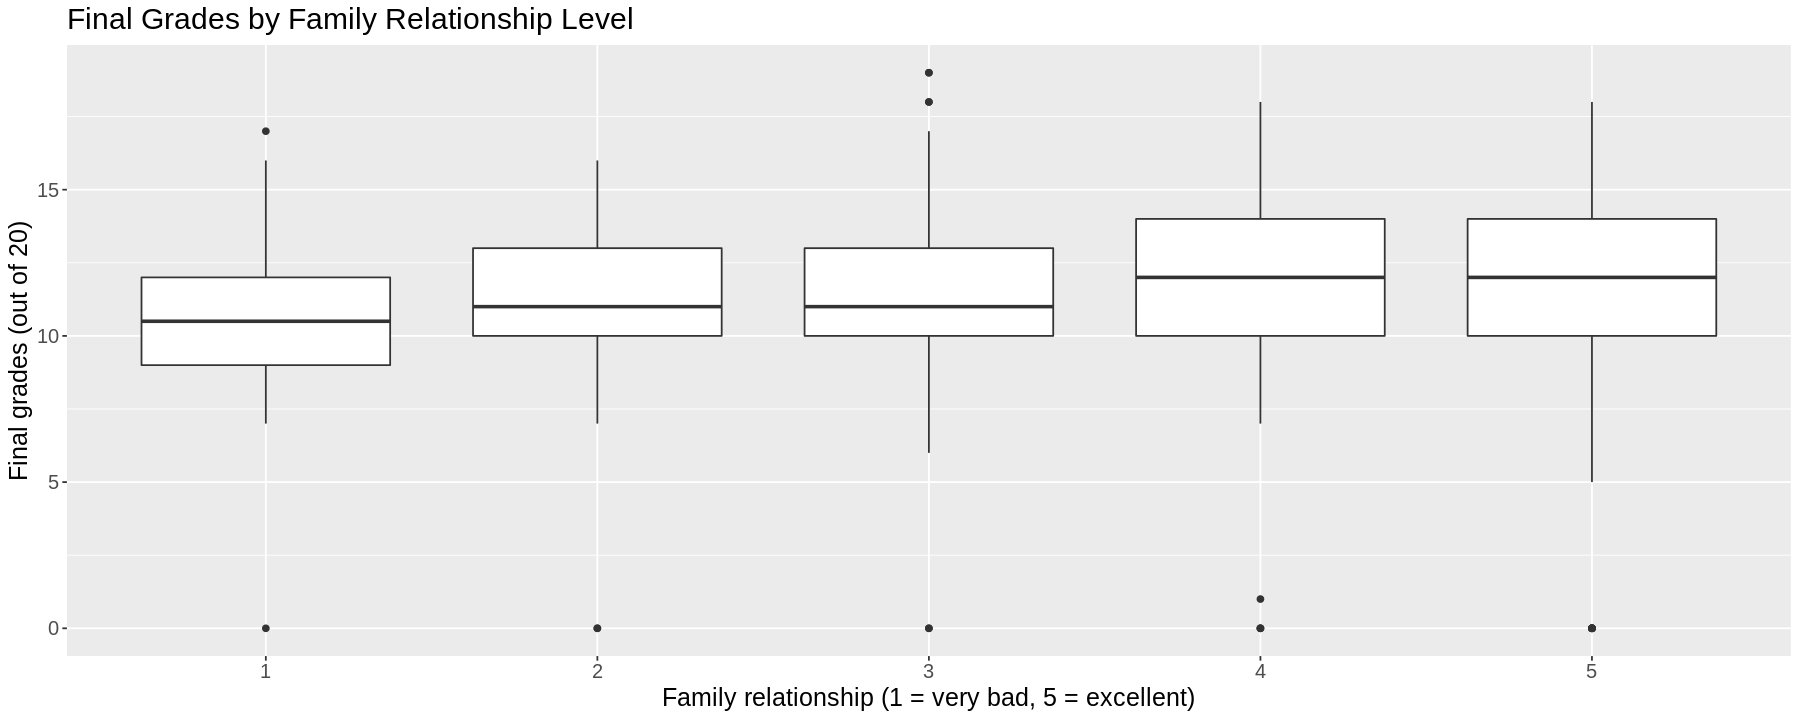

In [13]:
options(repr.plot.width=15, repr.plot.height=6)

fam_relation_grades <- ggplot(student_data, aes(x=as.factor(famrel), y=G3)) +
                            geom_boxplot() +
                            xlab("Family relationship (1 = very bad, 5 = excellent)") +
                            ylab("Final grades (out of 20)") +
                            ggtitle("Final Grades by Family Relationship Level") +
                            theme(text = element_text(size = 15))

fam_relation_grades

Additionally, one more analysis that we would like to visualize and further understand is **the impact of the student's age and their sex on their final grades.** At a first glance, it seems like there is a positive correlation between age and final grades.

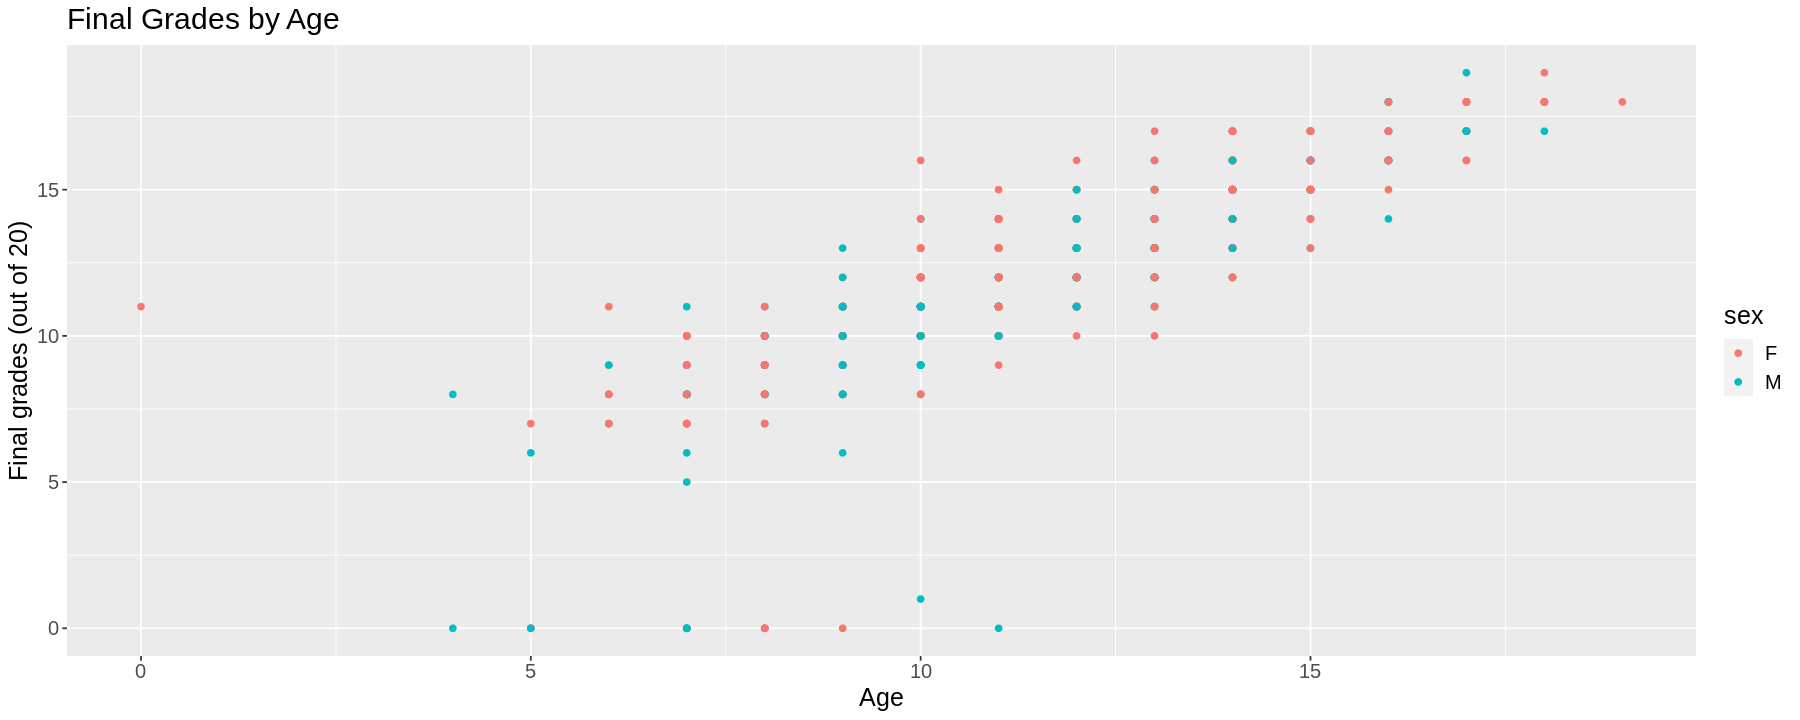

In [14]:
options(repr.plot.width=15, repr.plot.height=6)

absences_grades <- ggplot(student_data, aes(x=G1, y=G3, color=sex)) +
                            geom_point() +
                            xlab("Age") +
                            ylab("Final grades (out of 20)") +
                            ggtitle("Final Grades by Age") +
                            theme(text = element_text(size = 15))

absences_grades

### METHODS

This data analysis will focus mainly on the effects different factors of an individual student's life (ie. their parent's educational backgrounds/livelihoods, and the student's personal study habits) have on their final grades. Therefore, only about a third of the columns in the data set are necessary to understand these effects. The most pertinent factors when pursuing this analysis are those in association with family background, demographic and educational efforts of an individual. The necessary variables to trace the effects of family background would be parental educational background (Medu/Fedu), parental livelihood (Mjob/Fjob), parental marital status (Pstatus), family size and family relationships (famsize/famrel). The individuals demography would be represented by sex and age, and their educstional efforts by time spent studying (studytime), extra educational support (schoolsup) or paid classes (paid) and if the individual has a history of past failures (failures). The analysis of all these factors should show effects on the students final grades (G3).

In order to visualize this data, we will split the data into two different sections: 
1) One section will be specific to binary or categorical factors, such as if the student is receiving extra paid classes or not, or the overall rating of family relationships. This section will be represented by bar graphs or box plots (as represented above). 

2) The second section of categories will be for numerical factors such as study time and parental educational background. This type of data is best presented using scatterplots or line graphs. 

Using two different types of plots allows us to analyze trends in the dataset in a more exhaustive and cohesive manner, such as if there is a positive relationship between grades and study time, or if those with more stable or positive family backgrounds are receiving higher grades.

### EXPECTED OUTCOMES AND SIGNIFICANCE
**What do you expect to find?**

We expect to find that poor family relationships, lower individual efforts, poor past academic performances and less extra-curricular support will be indicators of poor.

We expect to find that these various factors outside of school resources, such as family background, individual effort, and extra-curricular educational support, play an important role in predicting a student's grades.

**What impact could such findings have?**

Understanding the importance of various factors that impact a student's performance at school could inform the decisions of students, parents, schools, as well as policymakers, in order to improve the conditions under which students learn, and increase their chances of performing well. However, we must consider the limited nature of this dataset, which only includes data from two schools, which decreases the generalizability of results.

**What future questions could this lead to?**

Some of the future questions this could lead to include:

- What is the relative importance of each of these factors that influence student performance? 
- To what extent can manipulation of these factors lead to changes in a student's performance? 
- Are there other factors beyond the ones we investigated, which play a large role in student performance? 
- Do these factors also impact the likelihood of a student pursuing higher education? 
- What is the impact of these factors on student well-being, and the relationship between student performance and well-being?
   